Total samples (first 20 tokens each): 50000
Label distribution: {1: 25000, 0: 25000}
Average review length (truncated): 19.997
Length standard deviation: 0.15745157985869818


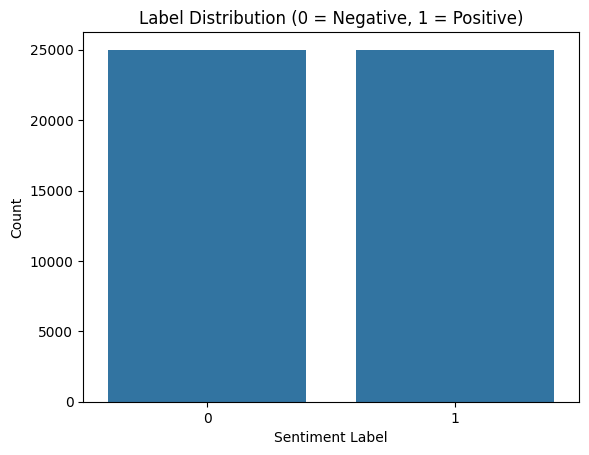

Training set shape: (40000, 10000)
Test set shape: (10000, 10000)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5884 - loss: 0.6659 - val_accuracy: 0.7172 - val_loss: 0.5464
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7581 - loss: 0.5003 - val_accuracy: 0.7264 - val_loss: 0.5345
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8126 - loss: 0.4148 - val_accuracy: 0.7193 - val_loss: 0.5617
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8629 - loss: 0.3339 - val_accuracy: 0.7205 - val_loss: 0.6269
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9031 - loss: 0.2505 - val_accuracy: 0.7108 - val_loss: 0.7311
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9265 - loss: 0.1918 - val_accuracy: 0.7045 - val_loss: 0.8333
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9469 - loss: 0.1446 - val_accuracy: 0.7034 - val_loss: 0.9371
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9553 - loss: 0.1207 - val_accuracy: 0.7111 - v

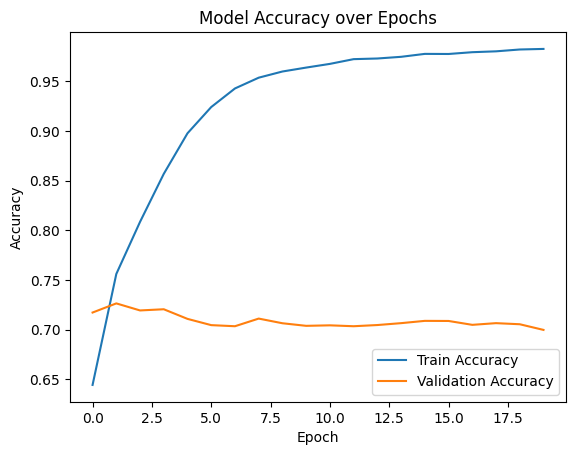

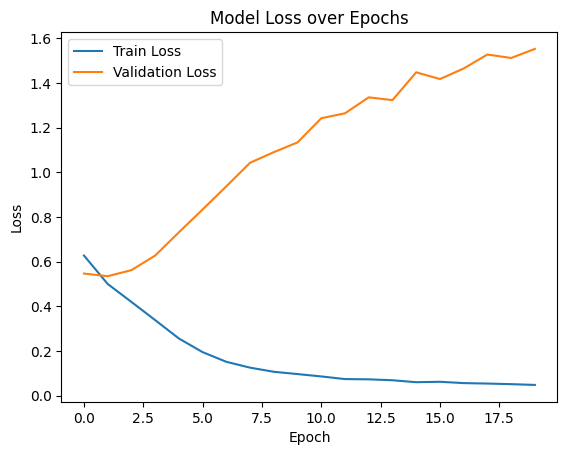

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================
# PROJECT: Binary Sentiment Classification on IMDB Movie Reviews
# OBJECTIVE: Build an NLP classifier to analyze customer sentiments
# DATA: 50,000 reviews labeled positive (1) or negative (0)
#       Preprocessed and encoded as sequences of word indices
# DOMAIN: Digital Content & Entertainment
# ============================================================

# ---------------------- Definitions -------------------------
# Epoch: One full pass through the entire training dataset.
# Batch size: Number of samples processed before model weights are updated.
# Vectorization: Converting text sequences into numeric vectors (one-hot encoding).
# One-hot encoding: Representing categorical data as binary vectors.
# Dropout: Randomly setting a fraction of inputs to zero during training to prevent overfitting.
# Overfitting: When a model fits the training data too closely and fails to generalize.
# Binary crossentropy: Loss function for binary classification (measures difference between true and predicted probabilities).
# Accuracy: Fraction of correct predictions.
# Validation data: Held-out dataset to monitor model performance on unseen data.
# EarlyStopping: Callback to halt training when a monitored metric stops improving.

# Load IMDB dataset (retain top 10,000 most frequent words)
# num_words=10000 -> Keeps only words with index < 10000 by frequency
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Truncate reviews to the first 20 words to speed up training
X_train = [review[:20] for review in X_train]
X_test  = [review[:20] for review in X_test]

# Consolidate sequences and labels for EDA
data_sequences = X_train + X_test
labels = np.concatenate((y_train, y_test), axis=0)

print("Total samples (first 20 tokens each):", len(data_sequences))
print("Label distribution:", pd.Series(labels).value_counts().to_dict())  # counts of 0 vs 1

# Compute basic statistics on sequence lengths
lengths = [len(seq) for seq in data_sequences]
print("Average review length (truncated):", np.mean(lengths))
print("Length standard deviation:", np.std(lengths))

# ------------------------ Graph 1 ---------------------------
# Label Distribution Plot:
#   - Shows count of negative (0) vs positive (1) reviews.
#   - Important to verify class balance before training.
sns.countplot(x=labels)
plt.title('Label Distribution (0 = Negative, 1 = Positive)')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# ---------------------- Vectorization -----------------------
# Function: vectorize
#   - sequences: list of integer lists (word indices)
#   - dimension: vocabulary size (10,000)
# Returns:
#   - 2D numpy array shape (num_samples, dimension)
#   - Each row is a one-hot vector marking presence of indices in the review.
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Set positions of words in the review to 1
        results[i, sequence] = 1.0
    return results

# Perform vectorization on all data
x_data = vectorize(data_sequences)
y_data = labels.astype('float32')  # Convert labels to float for Keras

# ---------------------- Train/Test Split -------------------
# Splitting into train and test sets (80/20 split)
# random_state ensures reproducibility of the split.
X_train_vec, X_test_vec, y_train_vec, y_test_vec = train_test_split(
    x_data, y_data, test_size=0.20, random_state=1
)
print("Training set shape:", X_train_vec.shape)
print("Test set shape:", X_test_vec.shape)

# ------------------------ Model Build -----------------------
# Sequential model: stack of layers
model = models.Sequential()
# Dense layer: fully connected neural network unit
#   - units=50: number of neurons in this layer
#   - activation='relu': rectified linear unit introduces non-linearity
#   - input_shape=(10000,): expects 10,000-dimensional input vectors
model.add(layers.Dense(50, activation='relu', input_shape=(10000,)))

# Dropout layer: randomly drop inputs to reduce overfitting
#   - rate=0.3 => 30% inputs set to zero during training
model.add(layers.Dropout(0.3))

# Additional hidden layers
model.add(layers.Dense(50, activation='relu'))  # 50 neurons + ReLU activation
model.add(layers.Dropout(0.2))                   # 20% dropout
model.add(layers.Dense(50, activation='relu'))  # 3rd dense layer

# Output layer for binary classification
#   - units=1: single logit
#   - activation='sigmoid': squashes output to [0,1] as probability of positive class
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()  # Prints layer details and parameter counts

# ----------------------- Compilation -----------------------
# model.compile:
#   - optimizer='adam': adaptive gradient-based optimizer
#   - loss='binary_crossentropy': suitable for binary classification
#   - metrics=['accuracy']: track accuracy during training/validation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping callback:
#   - monitor='loss': track training loss improvement
#   - patience=3: stop if loss does not improve for 3 consecutive epochs
callback = EarlyStopping(monitor='loss', patience=3)

# ------------------------ Training --------------------------
# results = model.fit(
#   X_train_vec, y_train_vec,
#   epochs=20,           # number of times to iterate over the dataset
#   batch_size=512,      # samples per gradient update
#   validation_data=(X_test_vec, y_test_vec),  # evaluate on test set each epoch
#   callbacks=[callback] # apply early stopping
# )
results = model.fit(
    X_train_vec, y_train_vec,
    epochs=20,
    batch_size=512,
    validation_data=(X_test_vec, y_test_vec),
    callbacks=[callback]
)

# ----------------------- Evaluation ------------------------
# Computes loss & accuracy on the test set
test_loss, test_acc = model.evaluate(X_test_vec, y_test_vec, batch_size=512)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

# ------------------------ Graph 2 ---------------------------
# Training & Validation Accuracy Plot:
#   - X-axis: Epoch number
#   - Y-axis: Accuracy
#   - Curves: Training vs Validation accuracy
#   - Importance: Check if model is learning and generalizing
plt.figure()
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ------------------------ Graph 3 ---------------------------
# Training & Validation Loss Plot:
#   - X-axis: Epoch number
#   - Y-axis: Loss (binary crossentropy)
#   - Curves: Training vs Validation loss
#   - Importance: Monitor convergence and detect overfitting (diverging loss curves)
plt.figure()
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


---

The user is asking for an explanation of how to build a binary classification model using a Deep Neural Network (DNN) to classify IMDB movie reviews into positive and negative categories. They want a step-by-step explanation with detailed code. I'll explain key steps like loading the IMDB dataset, preprocessing data (tokenization and sequence padding), building the DNN model (embedding, LSTM or dense layers), compiling it, training, and evaluating. I'll also break down important terms, like optimizer, loss functions, and metrics, in the context of code. Should I include the code here?


Thought for 4 seconds


Here’s a complete end‑to‑end example of binary sentiment classification on the IMDB movie‑review dataset using a simple Deep Neural Network (DNN) in Keras, followed by a line‑by‑line explanation of every key term.

---

## 1. Code Example

```python
# 1. Imports
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 2. Hyperparameters & Dataset Loading
vocab_size   = 10_000      # consider top 10k most frequent words
max_len      = 200         # truncate/pad reviews to 200 words
embedding_dim = 32         # size of word‑embedding vectors

# Load pre‑tokenized IMDB data: (X_train, y_train), (X_test, y_test)
# X_* are lists of integer word‑indices; y_* are 0 or 1 sentiment labels
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# 3. Preprocessing: pad/truncate all sequences to the same length
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test  = pad_sequences(X_test,  maxlen=max_len, padding='post', truncating='post')

# 4. Build the Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Flatten(),                                   # flatten 2D embeddings into 1D
    Dense(64, activation='relu'),                # hidden layer
    Dropout(0.5),                                # 50% units dropped each update
    Dense(1, activation='sigmoid')               # output: probability of positive
])

# 5. Compile: choose optimizer, loss, and evaluation metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 6. Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # hold out 20% of train set for validation
    epochs=10,
    batch_size=512,
    verbose=1
)

# 7. Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.3f}, Test Accuracy: {acc:.3f}")

# 8. Predict on new samples
sample_reviews = X_test[:3]
pred_probs = model.predict(sample_reviews)
pred_labels = (pred_probs > 0.5).astype(int).flatten()
for i, (prob, label) in enumerate(zip(pred_probs, pred_labels)):
    print(f"Review #{i}: P(positive)={prob[0]:.3f} → Predicted label = {label}")
```

---

## 2. Step‑By‑Step Explanation

### 1. Imports

* `imdb` from `tensorflow.keras.datasets`: built‑in IMDB sentiment dataset, already tokenized as word indices.
* `pad_sequences`: utility to make all input sequences the same length by padding or truncating.
* `Sequential`: Keras model type where you stack layers linearly.
* Layers:

  * `Embedding`: learns a dense vector representation (embedding) for each word index.
  * `Flatten`: collapses the 2D embedding output into 1D so it can feed into `Dense`.
  * `Dense`: fully‑connected (aka “feed‑forward”) layer.
  * `Dropout`: regularization layer that randomly “drops” a fraction of inputs each batch to prevent overfitting.
* `Adam`: popular adaptive‑learning‑rate optimizer.

### 2. Hyperparameters & Dataset Loading

* **`vocab_size = 10_000`**
  Only the top 10,000 most frequent words in the IMDB corpus are kept; rarer words mapped to “out of vocabulary.”
* **`max_len = 200`**
  All reviews longer than 200 tokens are truncated; shorter ones are padded (here with zeros at the end).
* **`embedding_dim = 32`**
  Each of the 10,000 words is mapped to a 32‑dimensional continuous vector.
* **`imdb.load_data(num_words=vocab_size)`**
  Returns four NumPy arrays:

  * `X_train`, `X_test`: lists of integer sequences (word indices).
  * `y_train`, `y_test`: binary labels (`0`=negative, `1`=positive).

### 3. Preprocessing with `pad_sequences`

```python
pad_sequences(
    sequences,
    maxlen=max_len,
    padding='post',      # add zeros **after** the sequence
    truncating='post'    # truncate long reviews at the **end**
)
```

Ensures `X_train` and `X_test` have shape `(num_samples, max_len)`.

### 4. Model Architecture

```python
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
```

* **`Embedding(input_dim, output_dim, input_length)`**
  Learns `input_dim` (=10 000) embedding vectors of length `output_dim` (=32). Output shape: `(batch_size, max_len, embedding_dim)`.
* **`Flatten()`**
  Converts `(batch_size, max_len, embedding_dim)` → `(batch_size, max_len * embedding_dim)`.
* **`Dense(64, activation='relu')`**
  Hidden layer with 64 neurons; **ReLU** sets negative inputs to zero, helping with gradient flow.
* **`Dropout(0.5)`**
  During training, randomly sets 50% of inputs to zero each update to reduce co‑adaptation of neurons.
* **`Dense(1, activation='sigmoid')`**
  Single‑unit output; **sigmoid** squashes to $(0,1)$, interpretable as probability of the “positive” class.

### 5. Compile Step

```python
model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)
```

* **`optimizer='adam'`**
  Uses adaptive moment estimation for efficient, per‑parameter learning rates.
* **`loss='binary_crossentropy'`**
  Appropriate for two‑class classification with sigmoid outputs:

  $$
    L = -\bigl[y\log(\hat y) + (1-y)\log(1-\hat y)\bigr]
  $$
* **`metrics=['accuracy']`**
  During training, Keras reports the fraction of correctly classified samples (thresholding $\hat y>0.5$).

### 6. Training with `fit()`

```python
model.fit(
  X_train, y_train,
  validation_split=0.2,   # hold out 20% of train data to monitor validation loss/accuracy
  epochs=10,              # number of full passes over the training data
  batch_size=512,         # number of samples per gradient update
  verbose=1
)
```

* **`validation_split`** helps detect overfitting if validation performance degrades while train performance improves.

### 7. Evaluation with `evaluate()`

```python
loss, acc = model.evaluate(X_test, y_test)
```

Returns final test-set **loss** and **accuracy** for an unbiased assessment.

### 8. Prediction

```python
pred_probs = model.predict(sample_reviews)
pred_labels = (pred_probs > 0.5).astype(int)
```

* **`predict()`** returns raw probabilities.
* We threshold at 0.5 to get binary class labels.

---

With these steps and explanations, you have a clear blueprint for building, training, and understanding a DNN‑based binary text classifier on the IMDB dataset.
